In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config Completer.use_jedi = False
import re

In [2]:
df = pd.read_excel('Diemthi_thpt_quocgia_2016.xlsx',engine='openpyxl') #phải có engine để chạy được xlsx
df

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...
...,...,...,...,...,...,...
34821,HUI014539,VÒNG NGỌC YẾN,15/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 0.75 Ngữ văn: 5.00 Hóa học: 4....
34822,HUI014540,VÒNG THANH YẾN,09/09/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.75 Ngữ văn: 5.75 Vật lí: 6.8...
34823,HUI014541,VŨ THỊ BẢO YẾN,19/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.00 Ngữ văn: 5.50 Vật lí: 5.6...
34824,HUI014542,VŨ THỊ YẾN,13/01/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 5.75 Ngữ văn: 6.00 Vật lí: 7.4...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34826 entries, 0 to 34825
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SOBAODANH   34826 non-null  object
 1   HO_TEN      34826 non-null  object
 2   NGAY_SINH   34826 non-null  object
 3   TEN_CUMTHI  34826 non-null  object
 4   GIOI_TINH   34826 non-null  object
 5   DIEM_THI    34826 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [60]:
pd.set_option('display.max_colwidth',3000) # xem giới các phần bị non display


In [61]:
df

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3.00 Địa lí: 5.00
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.50 Tiếng Anh: 3.68
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.75 Tiếng Anh: 2.25
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.50 Tiếng Anh: 1.50
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.25 Tiếng Anh: 2.00
...,...,...,...,...,...,...
34821,HUI014539,VÒNG NGỌC YẾN,15/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 0.75 Ngữ văn: 5.00 Hóa học: 4.80 Sinh học: 5.20
34822,HUI014540,VÒNG THANH YẾN,09/09/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.75 Ngữ văn: 5.75 Vật lí: 6.80 Hóa học: 4.60 Sinh học: 4.60 Tiếng Anh: 3.33
34823,HUI014541,VŨ THỊ BẢO YẾN,19/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.00 Ngữ văn: 5.50 Vật lí: 5.60 Tiếng Anh: 3.60
34824,HUI014542,VŨ THỊ YẾN,13/01/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 5.75 Ngữ văn: 6.00 Vật lí: 7.40 Hóa học: 4.80 Tiếng Anh: 2.88


In [62]:
MONHOC = ('Toán','Ngữ văn', 'Lịch sử','Địa lí','Vật lí','Hóa học','Sinh học', 'Tiếng Anh')
MONHOC


('Toán',
 'Ngữ văn',
 'Lịch sử',
 'Địa lí',
 'Vật lí',
 'Hóa học',
 'Sinh học',
 'Tiếng Anh')

In [63]:
def convert_to_pd(x):
    dic={}
    for i in MONHOC:
        chuoi_tim = i + ":" + '\s\s\s\d.\d\d'
        match = re.search(chuoi_tim,x)
        if match:
            tmp_list = list(match.group().partition(':  '))
            dic[i] = [(float(tmp_list[2]))] # Phần tử phải để dạng list, để tránh bị lỗi f using all scalar values, you must pass an index xảy ra ở dataframe
        else:
            dic[i] = np.nan
    return pd.DataFrame(dic)

In [64]:
df_target = pd.DataFrame(columns=list(MONHOC))
df_target

,Toán,Ngữ văn,Lịch sử,Địa lí,Vật lí,Hóa học,Sinh học,Tiếng Anh


In [65]:
for index in range(df.shape[0]):
    str_diem = df.DIEM_THI[index]
    df_target = pd.concat([df_target, convert_to_pd(str_diem)],ignore_index=True, sort=False)
df_target    

,Toán,Ngữ văn,Lịch sử,Địa lí,Vật lí,Hóa học,Sinh học,Tiếng Anh
0,2.00,5.50,3.0,5.00,NaN,NaN,NaN,NaN
1,5.50,5.25,NaN,5.50,NaN,NaN,NaN,3.68
2,4.50,5.50,NaN,3.75,NaN,NaN,NaN,2.25
3,3.00,6.00,NaN,5.50,NaN,NaN,NaN,1.50
4,2.25,4.75,NaN,5.25,NaN,NaN,NaN,2.00
...,...,...,...,...,...,...,...,...
34821,0.75,5.00,NaN,NaN,NaN,4.8,5.2,NaN
34822,4.75,5.75,NaN,NaN,6.8,4.6,4.6,3.33
34823,4.00,5.50,NaN,NaN,5.6,NaN,NaN,3.60
34824,5.75,6.00,NaN,NaN,7.4,4.8,NaN,2.88


In [66]:
df_target.tail()

,Toán,Ngữ văn,Lịch sử,Địa lí,Vật lí,Hóa học,Sinh học,Tiếng Anh
34821,0.75,5.00,NaN,NaN,NaN,4.8,5.2,NaN
34822,4.75,5.75,NaN,NaN,6.8,4.6,4.6,3.33
34823,4.00,5.50,NaN,NaN,5.6,NaN,NaN,3.60
34824,5.75,6.00,NaN,NaN,7.4,4.8,NaN,2.88
34825,2.50,4.25,NaN,NaN,4.2,4.4,4.4,3.00


In [67]:
df_target.head()

,Toán,Ngữ văn,Lịch sử,Địa lí,Vật lí,Hóa học,Sinh học,Tiếng Anh
0,2.00,5.50,3.0,5.00,NaN,NaN,NaN,NaN
1,5.50,5.25,NaN,5.50,NaN,NaN,NaN,3.68
2,4.50,5.50,NaN,3.75,NaN,NaN,NaN,2.25
3,3.00,6.00,NaN,5.50,NaN,NaN,NaN,1.50
4,2.25,4.75,NaN,5.25,NaN,NaN,NaN,2.00


In [68]:
# lst_data=[]
# for i in range(len(df)):
#     str_dt= df.DIEM_THI[i]
#     lst_dt=df.DIEM_THI[i].replace("   ",",").replace(":","").split(",")
#     dic_dt=dict(zip(lst_dt[0::2], lst_dt[1::2]))
#     frame_dt=pd.DataFrame(dic_dt,index=[0])
#     lst_data.append(frame_dt)
#     final_dt=pd.concat(lst_data, ignore_index=True, sort=False)
# final_dt

In [70]:
df_result = pd.concat([df,df_target], axis=1)
df_result

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI,Toán,Ngữ văn,Lịch sử,Địa lí,Vật lí,Hóa học,Sinh học,Tiếng Anh
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3.00 Địa lí: 5.00,2.00,5.50,3.0,5.00,NaN,NaN,NaN,NaN
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.50 Tiếng Anh: 3.68,5.50,5.25,NaN,5.50,NaN,NaN,NaN,3.68
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.75 Tiếng Anh: 2.25,4.50,5.50,NaN,3.75,NaN,NaN,NaN,2.25
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.50 Tiếng Anh: 1.50,3.00,6.00,NaN,5.50,NaN,NaN,NaN,1.50
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.25 Tiếng Anh: 2.00,2.25,4.75,NaN,5.25,NaN,NaN,NaN,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34821,HUI014539,VÒNG NGỌC YẾN,15/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 0.75 Ngữ văn: 5.00 Hóa học: 4.80 Sinh học: 5.20,0.75,5.00,NaN,NaN,NaN,4.8,5.2,NaN
34822,HUI014540,VÒNG THANH YẾN,09/09/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.75 Ngữ văn: 5.75 Vật lí: 6.80 Hóa học: 4.60 Sinh học: 4.60 Tiếng Anh: 3.33,4.75,5.75,NaN,NaN,6.8,4.6,4.6,3.33
34823,HUI014541,VŨ THỊ BẢO YẾN,19/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.00 Ngữ văn: 5.50 Vật lí: 5.60 Tiếng Anh: 3.60,4.00,5.50,NaN,NaN,5.6,NaN,NaN,3.60
34824,HUI014542,VŨ THỊ YẾN,13/01/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 5.75 Ngữ văn: 6.00 Vật lí: 7.40 Hóa học: 4.80 Tiếng Anh: 2.88,5.75,6.00,NaN,NaN,7.4,4.8,NaN,2.88


d:\it\python\python_2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


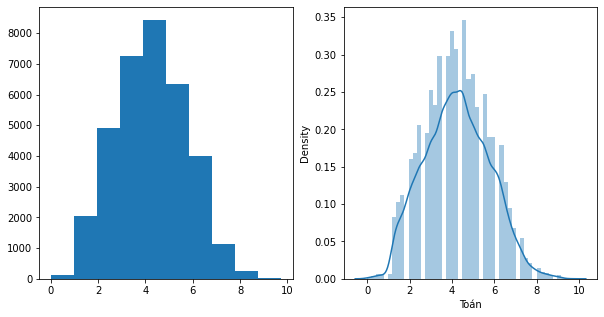

In [80]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1) #1 hàng, 2 cột, ở vị trí thứ 1
plt.hist(df_result.Toán.dropna()) # loại bỏ những giá trị null
plt.subplot(1,2,2)
sns.distplot(df_result.Toán.dropna())
plt.show()